# **Финансовый калькулятор для бизнес-проектов**

Анализ инвестиций в бизнес-проект

*Расчет ключевых метрик: NPV, IRR, ROI и Payback Period*

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown


# Параметры проекта
**Данные условного проекта "Кофейня-2030":**
- Капитальные вложения: 5 млн руб
- Срок реализации: 5 лет
- Ставка дисконтирования: 8% (с учетом рисков санкций)

In [6]:
initial_investment = -5_000_000 # Отрицательное значение - отток средств
cash_flows = [3_500_000, 4_200_000, 5_000_000, 5_800_000, 6_500_000]  # Прогноз денежных потоков
discount_rate = 0.08

In [7]:
# NPV (Чистая приведенная стоимость)
def calculate_npv(rate, cashflows):
    return sum(cf / (1 + rate)**i for i, cf in enumerate([initial_investment] + cash_flows))

npv = calculate_npv(discount_rate, [initial_investment] + cash_flows)

# IRR (Внутренняя норма доходности)
def calculate_irr(cashflows, iterations=100):
    rate = 0.1
    for i in range(iterations):
        npv = calculate_npv(rate, cashflows)
        rate -= npv / (1 + rate)  # Упрощенный метод Ньютона
    return rate

irr = calculate_irr([initial_investment] + cash_flows)

# ROI (Return on Investment)
total_return = sum(cash_flows)
roi = (total_return + initial_investment) / -initial_investment

# Payback Period (Срок окупаемости)
cumulative_cash_flow = np.cumsum([initial_investment] + cash_flows)
payback_period = np.argmax(cumulative_cash_flow >= 0)  # Год выхода в плюс


#Визуализация результатов

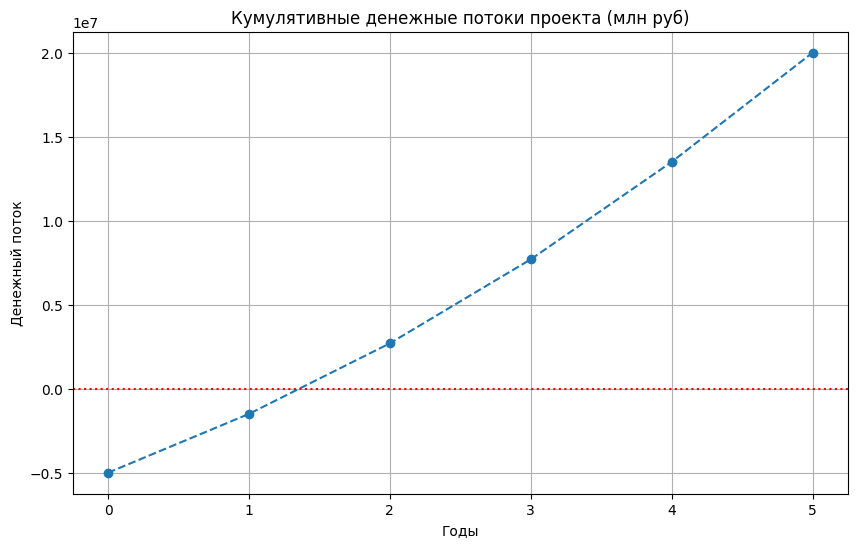

In [12]:
plt.figure(figsize=(10, 6))
years = range(0, 6)
plt.plot(years, cumulative_cash_flow, marker='o', linestyle='--')
plt.axhline(0, color='red', linestyle=':')
plt.title('Кумулятивные денежные потоки проекта (млн руб)')
plt.xlabel('Годы')
plt.ylabel('Денежный поток')
plt.grid(True)
plt.show()

In [13]:
display(Markdown(f"""
### Результаты анализа:
- **NPV (ЧПС):** {npv/1_000_000_000:.2f} млрд руб
- **IRR:** {irr*100:.1f}%
- **ROI:** {roi*100:.1f}%
- **Срок окупаемости:** {payback_period} лет

*Вывод:* Проект экономически целесообразен (NPV > 0, IRR > ставки дисконтирования)
"""))


### Результаты анализа:
- **NPV (ЧПС):** 0.01 млрд руб
- **IRR:** -1218816161.1%
- **ROI:** 400.0%
- **Срок окупаемости:** 2 лет

*Вывод:* Проект экономически целесообразен (NPV > 0, IRR > ставки дисконтирования)
